In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('traffic-crashes.csv')
data.head()

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7...,NaN,09/05/2023 07:05:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DUSK,ANGLE,"FIVE POINT, OR MORE",...,2.0,0.0,2.0,0.0,19,3,9,NaN,NaN,NaN
1,2675c13fd0f474d730a5b780968b3cafc7c12d7adb661f...,NaN,09/22/2023 06:45:00 PM,50,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,...,0.0,0.0,2.0,0.0,18,6,9,NaN,NaN,NaN
2,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,NaN,07/29/2023 02:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,1.0,0.0,14,7,7,41.85412,-87.665902,POINT (-87.665902342962 41.854120262952)
3,7ebf015016f83d09b321afd671a836d6b148330535d5df...,NaN,08/09/2023 11:00:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,NOT DIVIDED,...,0.0,0.0,2.0,0.0,23,4,8,NaN,NaN,NaN
4,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,NaN,08/18/2023 12:50:00 PM,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,...,1.0,0.0,1.0,0.0,12,6,8,NaN,NaN,NaN


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# checking null values
sorted_na = data.isna().sum()/data.shape[0]
to_drop = sorted_na[sorted_na>0.6].sort_values(ascending=False).index
data.drop(to_drop, inplace=True, axis=1)

In [5]:
to_drop

Index(['WORKERS_PRESENT_I', 'DOORING_I', 'WORK_ZONE_TYPE', 'WORK_ZONE_I',
       'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'NOT_RIGHT_OF_WAY_I',
       'CRASH_DATE_EST_I', 'INTERSECTION_RELATED_I', 'LANE_CNT',
       'HIT_AND_RUN_I'],
      dtype='object')

In [6]:
data.nunique()

CRASH_RECORD_ID                  794956
CRASH_DATE                       521033
POSTED_SPEED_LIMIT                   45
TRAFFIC_CONTROL_DEVICE               19
DEVICE_CONDITION                      8
WEATHER_CONDITION                    12
LIGHTING_CONDITION                    6
FIRST_CRASH_TYPE                     18
TRAFFICWAY_TYPE                      20
ALIGNMENT                             6
ROADWAY_SURFACE_COND                  7
ROAD_DEFECT                           7
REPORT_TYPE                           3
CRASH_TYPE                            2
DAMAGE                                3
DATE_POLICE_NOTIFIED             603015
PRIM_CONTRIBUTORY_CAUSE              40
SEC_CONTRIBUTORY_CAUSE               40
STREET_NO                         11694
STREET_DIRECTION                      4
STREET_NAME                        1632
BEAT_OF_OCCURRENCE                  276
NUM_UNITS                            17
MOST_SEVERE_INJURY                    5
INJURIES_TOTAL                       20


#### Dealing with variables
1. drop the id
1. drop location
1. bin lat and long into far east, east, central, west, and far west west etc.
1. figure out date later

In [7]:
to_drop = ['CRASH_RECORD_ID', 'LOCATION', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH']
data.drop(to_drop, inplace=True, axis=1)

parsing date

In [8]:
data.CRASH_DATE = data.CRASH_DATE.apply(lambda x: pd.to_datetime(x, format="%m/%d/%Y %I:%M:%S %p"))
data.DATE_POLICE_NOTIFIED = data.DATE_POLICE_NOTIFIED.apply(lambda x: pd.to_datetime(x, format="%m/%d/%Y %I:%M:%S %p"))

In [9]:
# adding a column MINUTES TO NOTIFY and dropping the DATE NOTIFIED column

data['MUNITES_TO_NOTIFY'] = (data.DATE_POLICE_NOTIFIED - data.CRASH_DATE).apply(lambda x:x.seconds/60)
data.drop('DATE_POLICE_NOTIFIED', inplace=True, axis=1)

In [10]:
# function to assign the time of day using time as imput

import datetime
def get_TOD(time):
    if time < datetime.time(4):
        return 'Night'
    elif time < datetime.time(10):
        return 'Morning'
    elif time < datetime.time(15):
        return 'Noon'
    elif time < datetime.time(19):
        return 'Evening'
    else:
        return 'Night'

In [11]:
#creating a new columnn that contains the time of day of the crash
data['CRASH_TIME_OF_DAY'] = data.CRASH_DATE.apply(lambda x: get_TOD(x.time()))
#creating a new columnn that contains the month of the crash
data['CRASH_MONTH'] = data.CRASH_DATE.apply(lambda x : x.month_name())
#creating a new columnn that contains the day of the crash
data['CRASH_DAY_OF_WEEK'] = data.CRASH_DATE.apply(lambda x : x.day_name())

Converting column names to lowercase because I feel like I am yelling a lot XD

In [12]:
data.columns = [x for x in pd.Series([x for x in data.columns]).apply(lambda x : x.lower())]

In [13]:
data['injury_flag'] = data.injuries_total.apply(lambda x : 0 if x<1 else 1)
data['injured'] = data.injuries_total
data['deaths'] = data.injuries_fatal

binning latitudes and longitudes

In [14]:
data.latitude = pd.qcut(data.latitude, q=5,labels=['Far South', 'South', 'Central', 'North', 'Far North'])
data.longitude = pd.qcut(data.longitude, q=5,labels=['Far West', 'West', 'Central', 'East', 'Far East'])

because of the high degree of correlation we will drop columns related to injuries

In [15]:
data.drop([x for x in data.columns if 'injuries' in x], axis=1, inplace=True)

# Data Exploration

Count plots for nominal variables plotted to show how the target variable is split over categories

In [16]:
# Replacing values with <5% contribution with as 'Others'

cat_cols = [i for i in data.select_dtypes([object,'category']).columns]
cat_cols.remove('street_name')

for i in cat_cols:
    val_percentage = data[i].value_counts(normalize = True)*100
    to_replace = val_percentage[val_percentage<5].index.to_list()
    data[i] = data[i].replace(to_replace = to_replace, value ='Others')

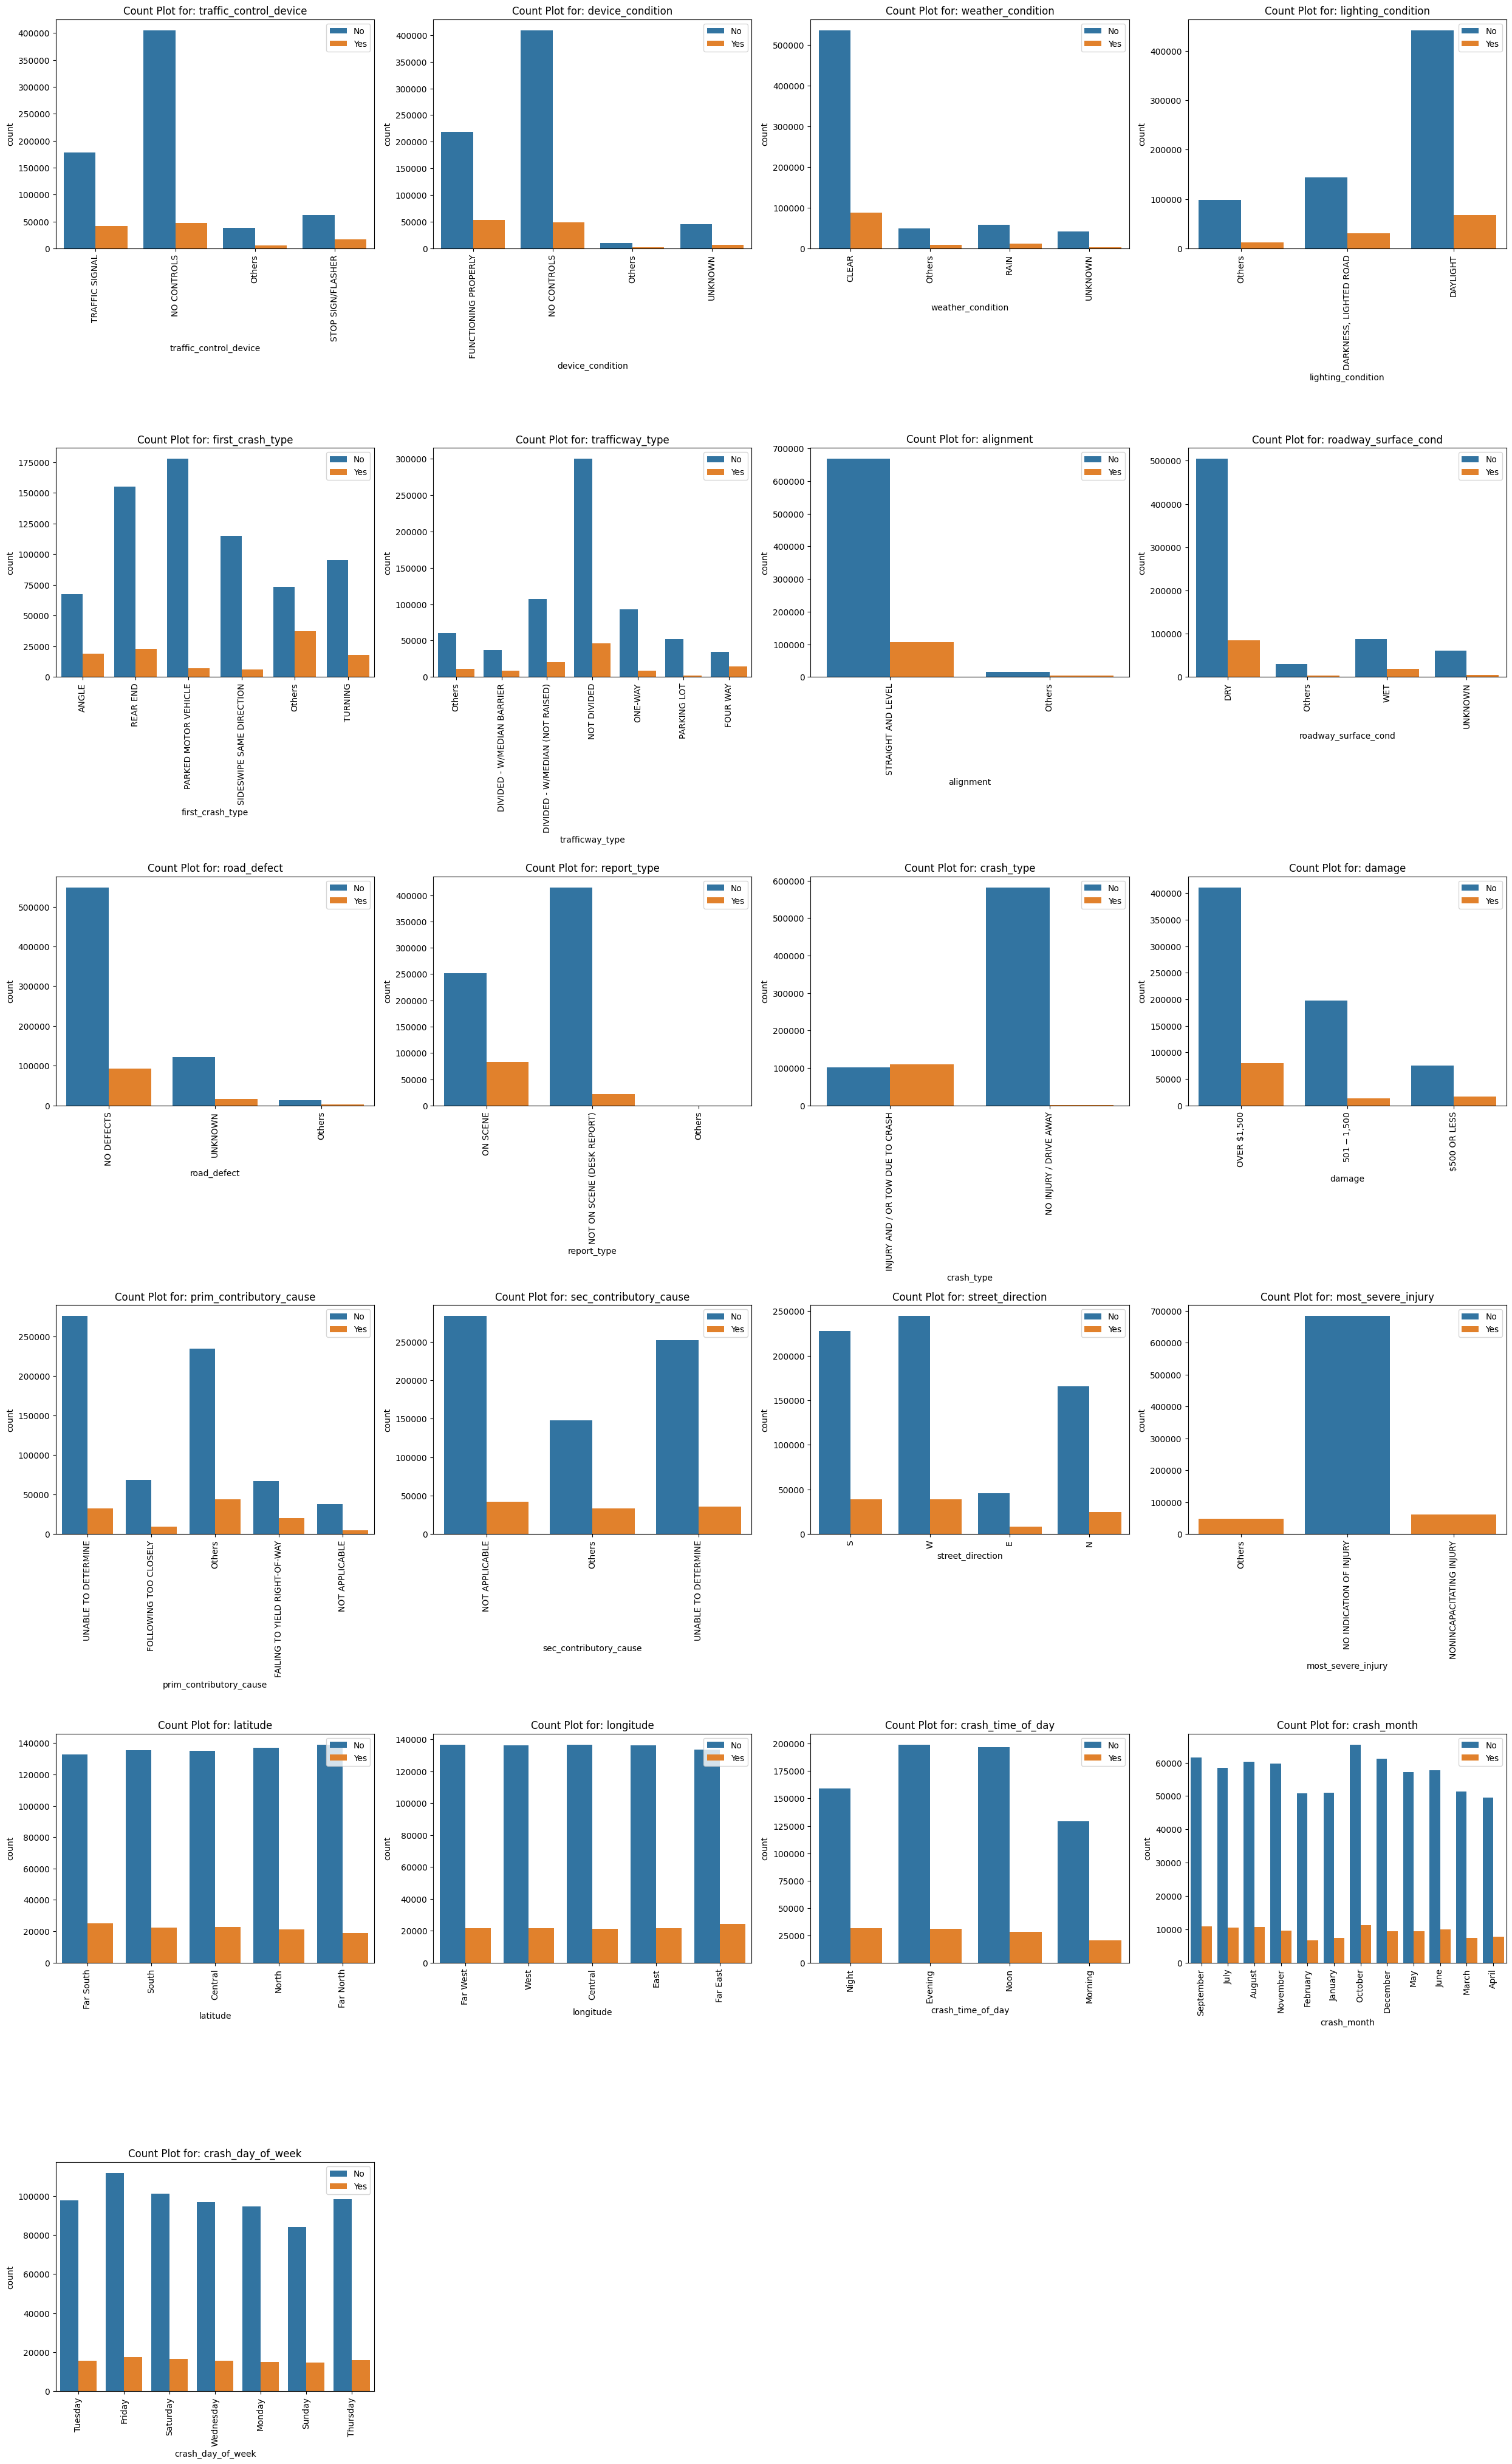

In [17]:

plt.figure(figsize=(25,40))
cnt = 1
for i in cat_cols:
    plt.subplot(int(np.ceil(len(cat_cols)/4)),4,cnt)
    sns.countplot(x=data[i], hue=data['injury_flag'])
    plt.tight_layout()
    plt.title('Count Plot for: '+i)
    plt.xticks(rotation = 90)
    plt.legend(['No', 'Yes'])
    cnt += 1

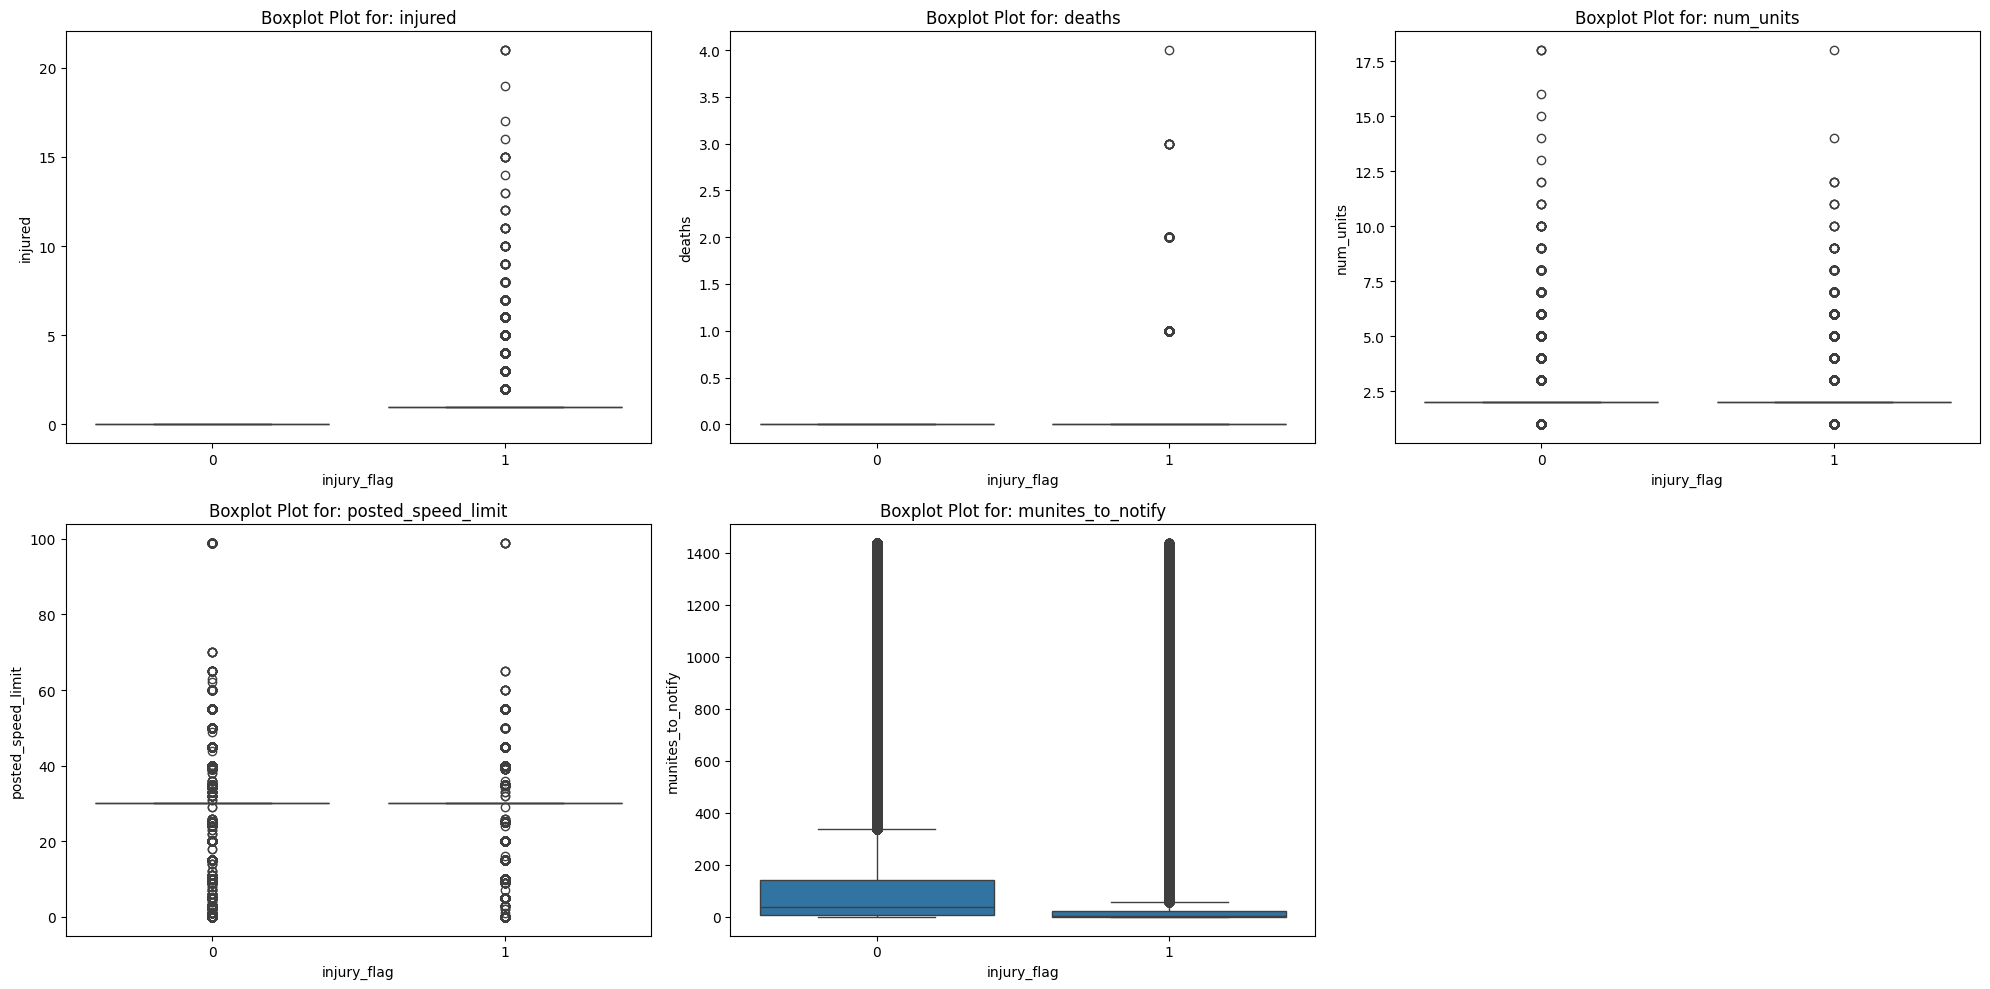

In [18]:
num_col = set(data.select_dtypes(np.number).columns)-{'beat_of_occurrence', 'injury_flag', 'street_no'}
cnt = 1
plt.figure(figsize=(20,10))
for i in num_col:
    plt.subplot(int(np.ceil(len(num_col)/3)),3,cnt)
    sns.boxplot(y=data[i],x=data.injury_flag)
    plt.tight_layout()
    plt.title('Boxplot Plot for: '+i)
    cnt += 1

# Pie Plots

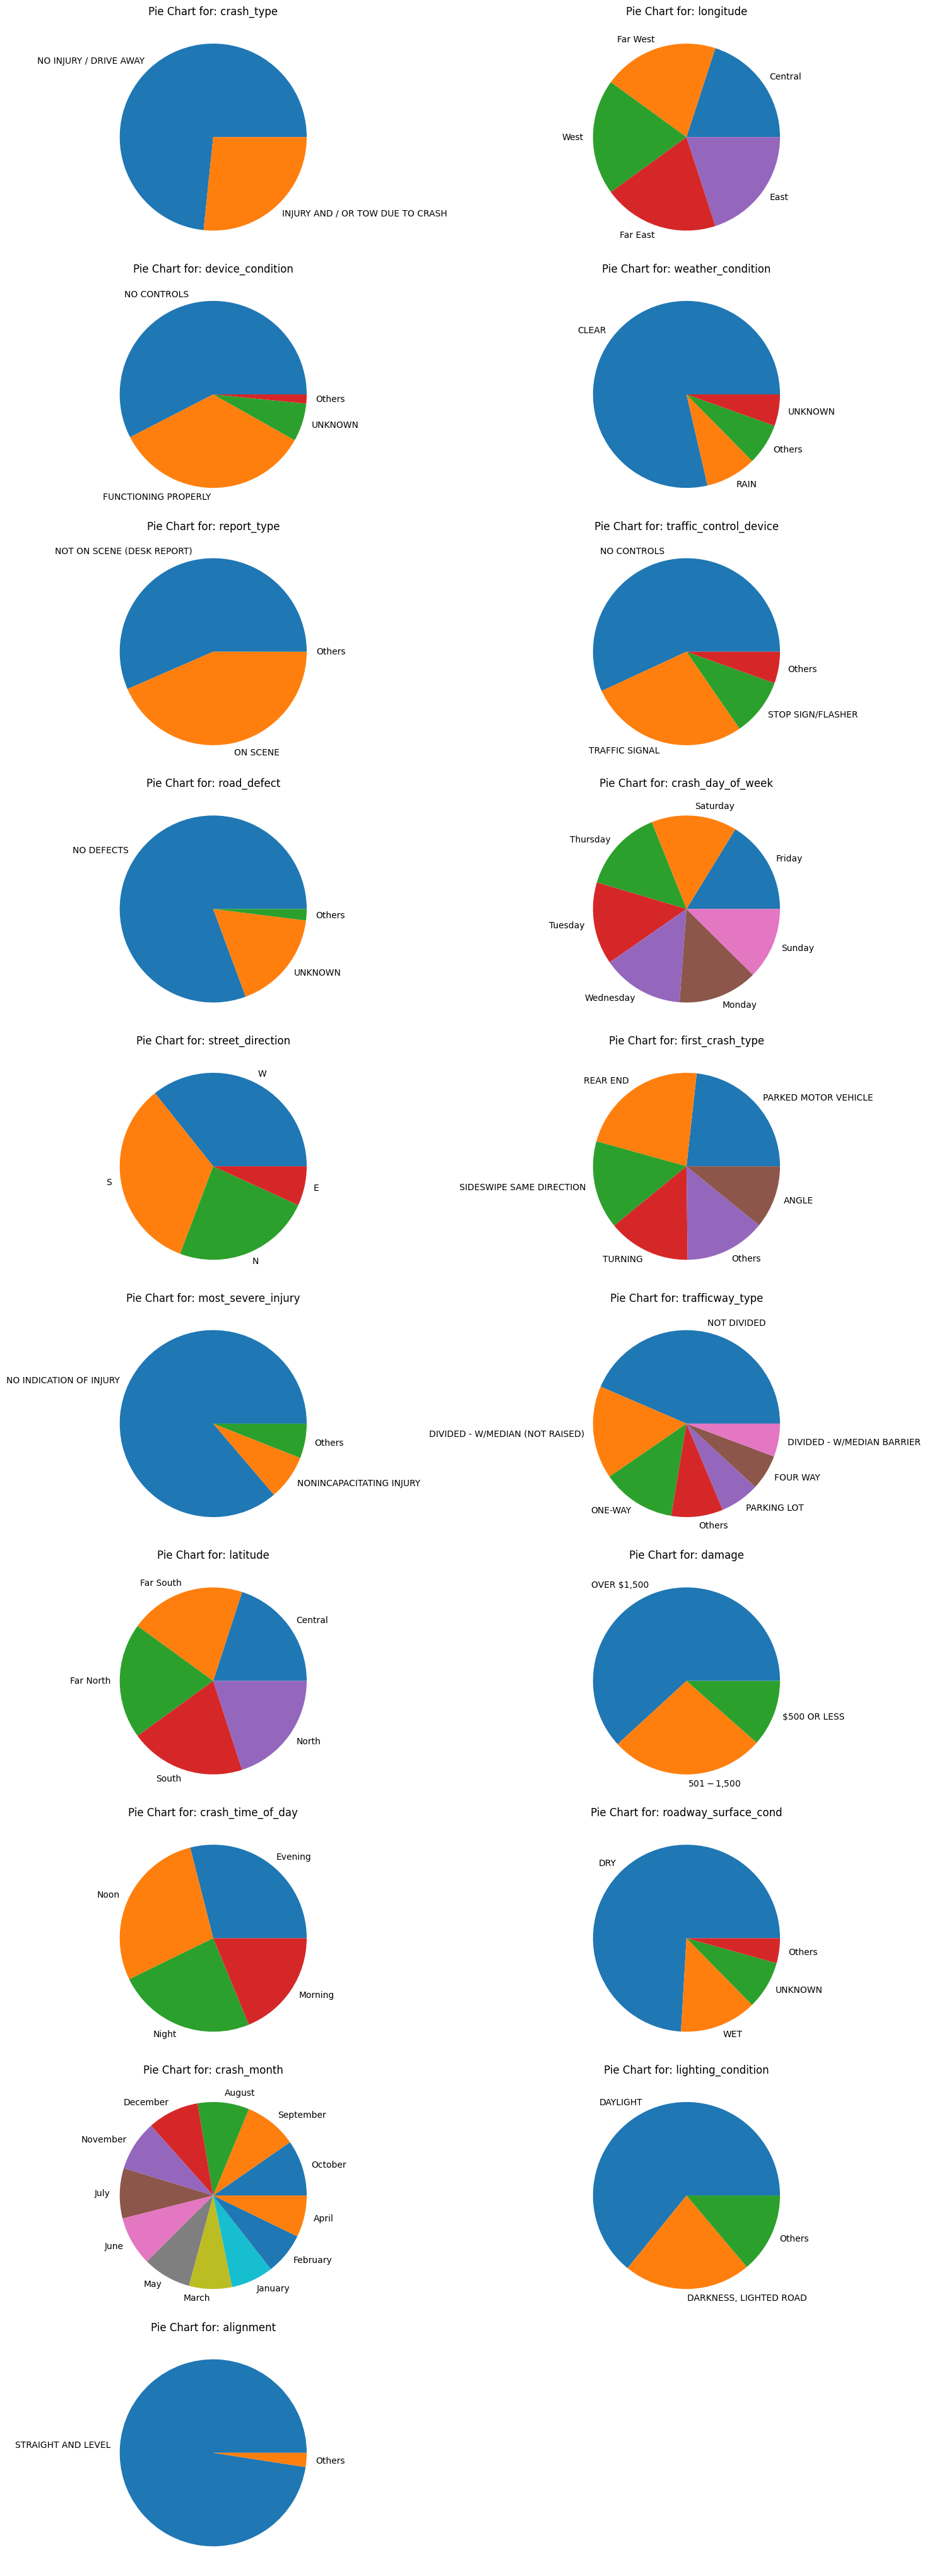

In [19]:
cnt = 1
plt.figure(figsize=(15,45))
for i in {i for i in cat_cols}-{'prim_contributory_cause', 'sec_contributory_cause'}:
    plt.subplot(int(np.ceil(len(cat_cols)/2)),2,cnt)
    data[i].value_counts(normalize=True).plot.pie()
    plt.tight_layout()
    plt.ylabel('')
    plt.title('Pie Chart for: '+i)
    plt.xticks(rotation = 90)
    cnt += 1

In [21]:
data

,crash_date,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,...,most_severe_injury,latitude,longitude,munites_to_notify,crash_time_of_day,crash_month,crash_day_of_week,injury_flag,injured,deaths
0,2023-09-05 19:05:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,Others,ANGLE,Others,STRAIGHT AND LEVEL,DRY,...,Others,NaN,NaN,0.0,Night,September,Tuesday,1,3.0,0.0
1,2023-09-22 18:45:00,50,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,STRAIGHT AND LEVEL,DRY,...,NO INDICATION OF INJURY,NaN,NaN,5.0,Evening,September,Friday,0,0.0,0.0
2,2023-07-29 14:45:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,...,NO INDICATION OF INJURY,Central,Central,0.0,Noon,July,Saturday,0,0.0,0.0
3,2023-08-09 23:00:00,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,...,NO INDICATION OF INJURY,NaN,NaN,40.0,Night,August,Wednesday,0,0.0,0.0
4,2023-08-18 12:50:00,15,Others,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,Others,STRAIGHT AND LEVEL,DRY,...,NONINCAPACITATING INJURY,NaN,NaN,5.0,Noon,August,Friday,1,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794951,2023-11-06 07:00:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,DRY,...,NO INDICATION OF INJURY,North,East,432.0,Morning,November,Monday,0,0.0,0.0
794952,2023-10-31 18:30:00,30,NO CONTROLS,NO CONTROLS,UNKNOWN,Others,SIDESWIPE SAME DIRECTION,Others,STRAIGHT AND LEVEL,UNKNOWN,...,NO INDICATION OF INJURY,Far South,Far East,44.0,Evening,October,Tuesday,0,0.0,0.0
794953,2023-11-04 23:00:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,DRY,...,NO INDICATION OF INJURY,Far South,Far East,1070.0,Night,November,Saturday,0,0.0,0.0
794954,2023-11-06 18:35:00,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,...,NO INDICATION OF INJURY,South,Far West,5.0,Evening,November,Monday,0,0.0,0.0
